In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.838542,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.370239,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
na_cols=df.columns[df.describe().loc["min"]==0][1:6] ##Get all the columns with minimum value 0 except Pregnancies and Outcome column
na_cols

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [8]:
repalce_0=lambda x:np.nan if x==0 else x

In [9]:
for col in na_cols:
    df[col]=df[col].map(repalce_0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

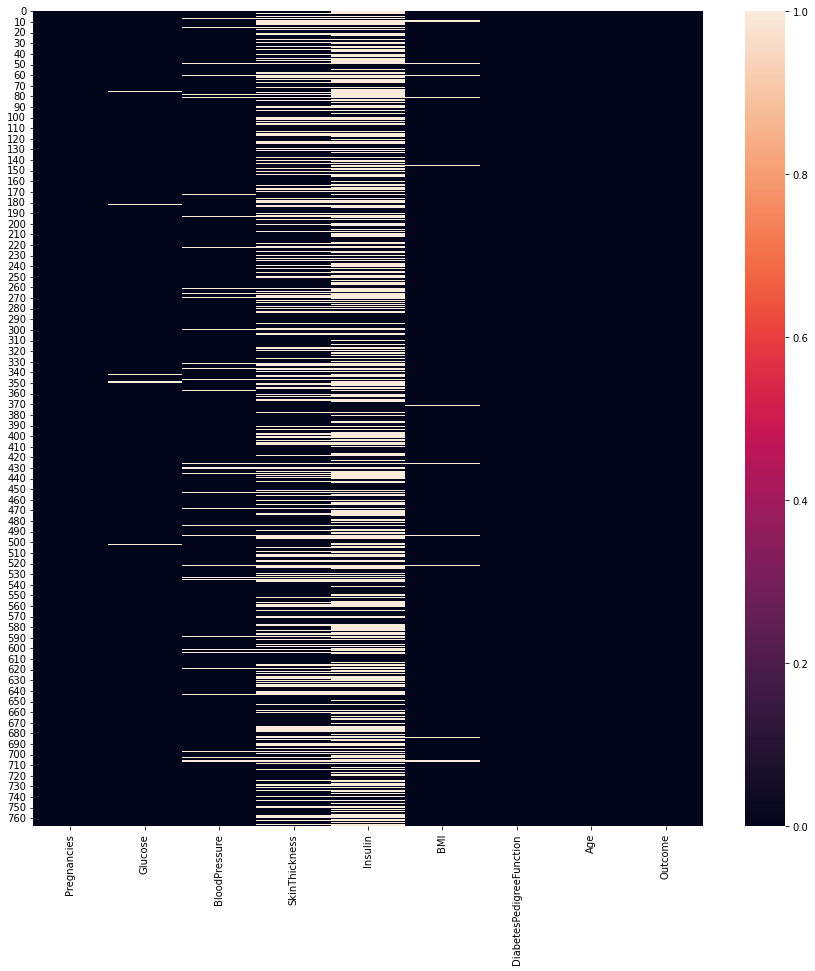

In [11]:
_,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.isnull(), ax = ax)

### There does not seem to be any pattern here for NA values and also the Insulin column seems to have a lot of NA valus

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

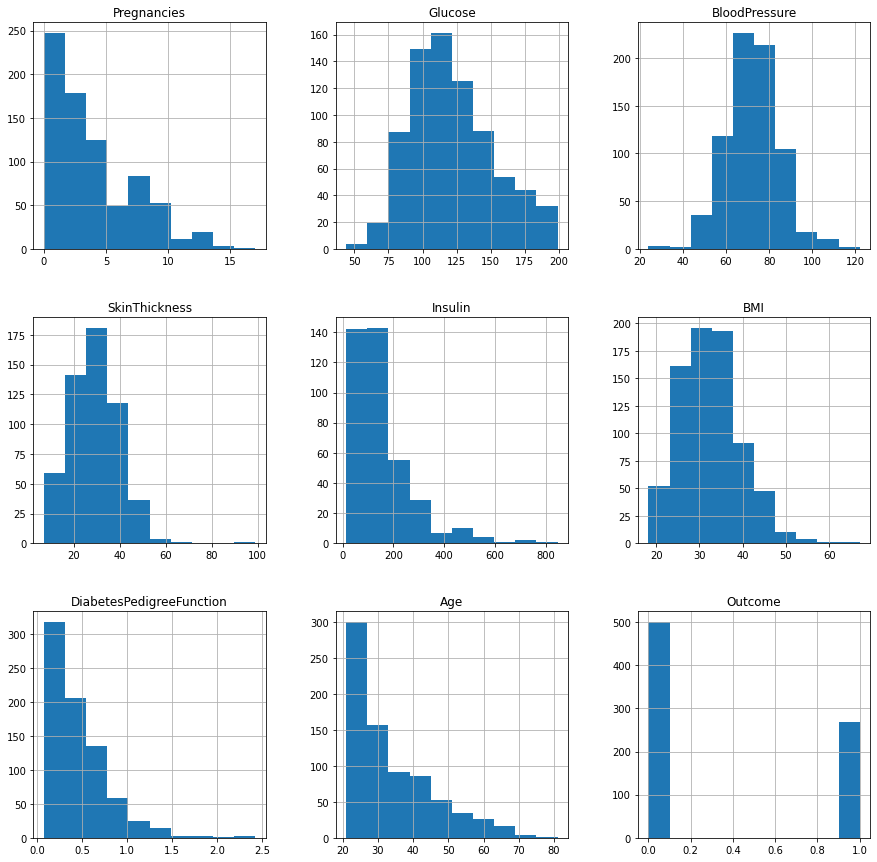

In [12]:
df.hist(figsize=(15,15))

###      There is to something wrong with 'Glucose' and 'BloodPressure' columns. Glucose below 70 is considered highly dangerous and BP cannot be less than 60. These are wrong values and I will replace them with NA.

In [13]:
replace_glucose_70=lambda x:np.nan if x<70 else x
replace_bp_60=lambda x:np.nan if x<60 else x

df["Glucose"]=df["Glucose"].map(replace_glucose_70)
df["BloodPressure"] = df["BloodPressure"].map(replace_bp_60)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   752 non-null    float64
 2   BloodPressure             647 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


###   For the columns that look gaussian(Glucose, SkinThickness, BMI,BloodPressure) I will be replacing NA values with mean and for other columns(Insulin) I will be replacing with median.

In [15]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<AxesSubplot:>

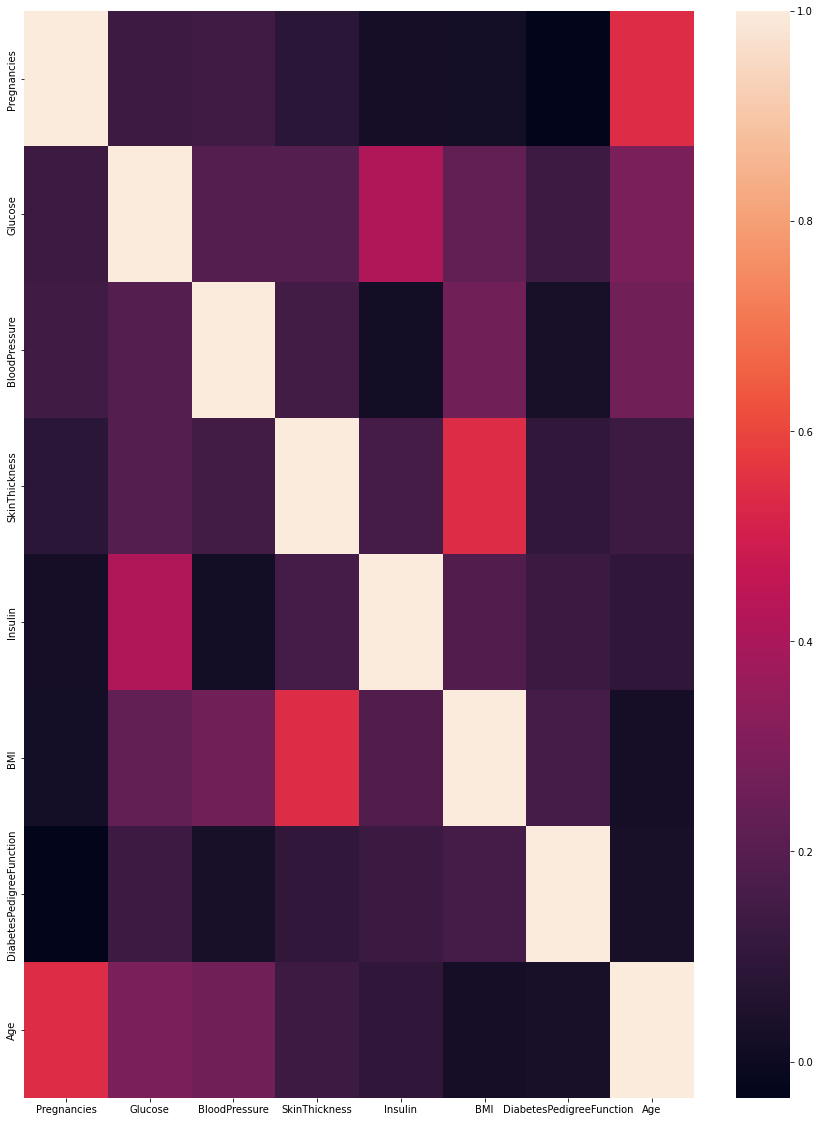

In [17]:
_,ax = plt.subplots(figsize=(15,20))
sns.heatmap(df[df.columns[:-1]].corr())

####   We can't remove the Insulin column as Glucose and Insulin have correlation. Insulin is used for glucose control and that might be the reason why. Also pregnancy and age also seem to have a correlation along with BMI and skin thickness. The correlations seem to make sense.

###  Pregnancies

In [18]:
df["Pregnancies"].value_counts()

1     136
0     111
2     103
3      75
4      68
5      57
6      49
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

There seem to be people with more than 10 pregnancies as well, to check the genuineness of the value, we can check the age as I believe it is impossible for people with less age(less than 25) to have more than 10 pregnancies.

In [19]:
df["Age"][df["Pregnancies"]==17] #check the age for woman with 17 pregnancies

159    47
Name: Age, dtype: int64

In [20]:
df["Age"][df["Pregnancies"] == 13]

28     57
72     42
86     45
274    52
323    43
357    44
518    41
635    38
691    44
744    39
Name: Age, dtype: int64

from the above observations age and pregnancies are making sense

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

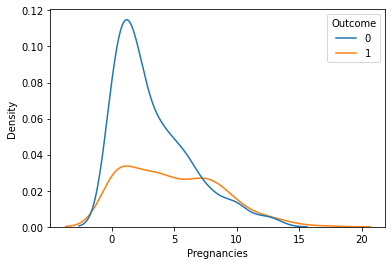

In [21]:
sns.kdeplot(data = df, x = "Pregnancies", hue="Outcome")

from the above KDE plot we can say people with low pregnancies have lower risk of diabetes

##  Glucose

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

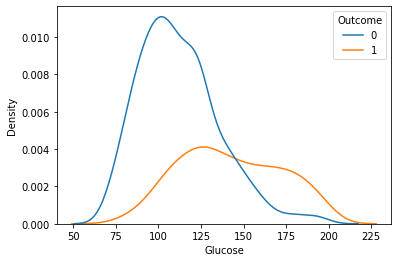

In [22]:
sns.kdeplot(data=df, x="Glucose", hue="Outcome")

People having diabetes have higher level of Glucose

###  BloodPressure

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

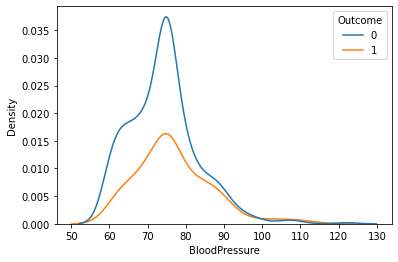

In [23]:
sns.kdeplot(data = df, x = "BloodPressure", hue="Outcome")

There is no much of a difference in BP between people with diabetes and healthy people

### INSULIN

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

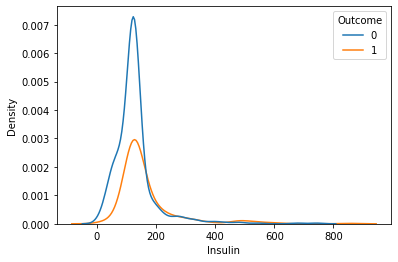

In [24]:
sns.kdeplot(data=df, x = "Insulin", hue="Outcome")# k density plot of Insulin for different Outcome values 


People with high Insulin seem to have Diabetes. We can use this for classification.

The large number in the middle corresponds to NA values which we have imputed with median.



### BMI

<AxesSubplot:xlabel='BMI', ylabel='Density'>

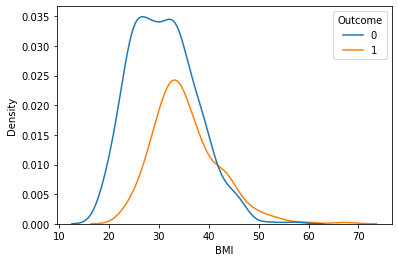

In [25]:
sns.kdeplot(data=df,x="BMI",hue="Outcome")

People with high BMI have high chance of getting Diabities

# MODEL TRAINING

## TRAIN_TEST Split

In [26]:
target=df.Outcome
inputs=df.drop('Outcome',axis='columns',inplace=True)

In [27]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,148.0,72.000000,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.000000,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.000000,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.000000,23.00000,94.0,28.1,0.167,21
4,0,137.0,75.095827,35.00000,168.0,43.1,2.288,33


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.3)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [31]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [32]:
model.fit(x_train,y_train)

GaussianNB()

In [33]:
model.score(x_test,y_test)

0.7748917748917749

In [34]:
x_test[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
15,7,100.0,75.095827,29.15342,125.0,30.0,0.484,32
762,9,89.0,62.000000,29.15342,125.0,22.5,0.142,33
112,1,89.0,76.000000,34.00000,37.0,31.2,0.192,23
723,5,117.0,86.000000,30.00000,105.0,39.1,0.251,42
296,2,146.0,70.000000,38.00000,360.0,28.0,0.337,29
443,8,108.0,70.000000,29.15342,125.0,30.5,0.955,33
728,2,175.0,88.000000,29.15342,125.0,22.9,0.326,22
467,0,97.0,64.000000,36.00000,100.0,36.8,0.600,25
735,4,95.0,60.000000,32.00000,125.0,35.4,0.284,28
341,1,95.0,74.000000,21.00000,73.0,25.9,0.673,36


In [35]:
y_test[:10]

15     1
762    0
112    0
723    0
296    1
443    1
728    0
467    0
735    0
341    0
Name: Outcome, dtype: int64

In [36]:
model.predict(x_test[:10])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
model.predict_proba(x_test[:10])

array([[0.90107843, 0.09892157],
       [0.93423155, 0.06576845],
       [0.98067212, 0.01932788],
       [0.65332024, 0.34667976],
       [0.55095268, 0.44904732],
       [0.68864164, 0.31135836],
       [0.43898584, 0.56101416],
       [0.93255025, 0.06744975],
       [0.94478421, 0.05521579],
       [0.97661635, 0.02338365]])

In [ ]:
from flask import Flask,render_template,request

app=Flask(__name__)

@app.route("/")
def hello():
    return render_template("Form.html")
@app.route("/sub",methods=["POST"])
def submit():
    if request.method=='POST':
        
        name=request.form["firstname"]
        age=int(request.form["age"])
        preg=int(request.form["preg"])
        glu=float(request.form["Glucose"])
        bp=float(request.form["bp"])
        thick=float(request.form['skin'])
        ins=float(request.form['insulin'])
        bmi=float(request.form['BMI'])
        sc=float(request.form['score'])
        new_input=[[preg,glu,bp,thick,ins,bmi,sc,age]]
        new_output=int(model.predict(new_input))
        if(new_output==0):
            op='No'
        else:
            op='Yes'
    return render_template("result.html",na=name,ag=age,pr=preg,gl=glu,b=bp,thi=thick,insu=ins,bm=bmi,scr=sc,dia=op)
if __name__=="__main__":
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
